# Weather Data Prediction 
I chose this project to predict the weather near Jackson, MI. This is where fsae competion is in the summer.
The weather data came from https://nowdata.rcc-acis.org/grr/. I collected by hand and combined the data from 2018 to 2023. 

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

weatherIn = pd.read_csv('weatherCSV.csv')
weatherIn['Precip'].replace('T', np.nan, inplace=True)
weatherIn['Precip'] = pd.to_numeric(weatherIn['Precip'], errors='coerce')
mean_precip = weatherIn['Precip'].mean()
weatherIn['Precip'].fillna(mean_precip, inplace=True)
# Create data from only 2018
weatherIn['Date'] = pd.to_datetime(weatherIn['Date'])
weatherIn2018 = weatherIn[weatherIn['Date'].dt.year == 2018]


print(weatherIn.head())

        Date  MaxTmp  MinTmp  AvgTmp  Depart  HDD  CDD  Precip NewSnow  \
0 2018-05-01      83      55    69.0    15.9    0    4    0.00       0   
1 2018-05-02      84      64    74.0    20.5    0    9    0.03       0   
2 2018-05-03      72      59    65.5    11.7    0    1    0.57       0   
3 2018-05-04      72      55    63.5     9.3    1    0    0.12       0   
4 2018-05-05      80      56    68.0    13.4    0    3    0.00       0   

   SnowDep  
0        0  
1        0  
2        0  
3        0  
4        0  


/var/folders/zp/xzl97jrj4bgfcnnjjm_hk2dc0000gn/T/ipykernel_23989/2097001915.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weatherIn['Precip'].replace('T', np.nan, inplace=True)
/var/folders/zp/xzl97jrj4bgfcnnjjm_hk2dc0000gn/T/ipykernel_23989/2097001915.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

# Looking at Data Distrobutions

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


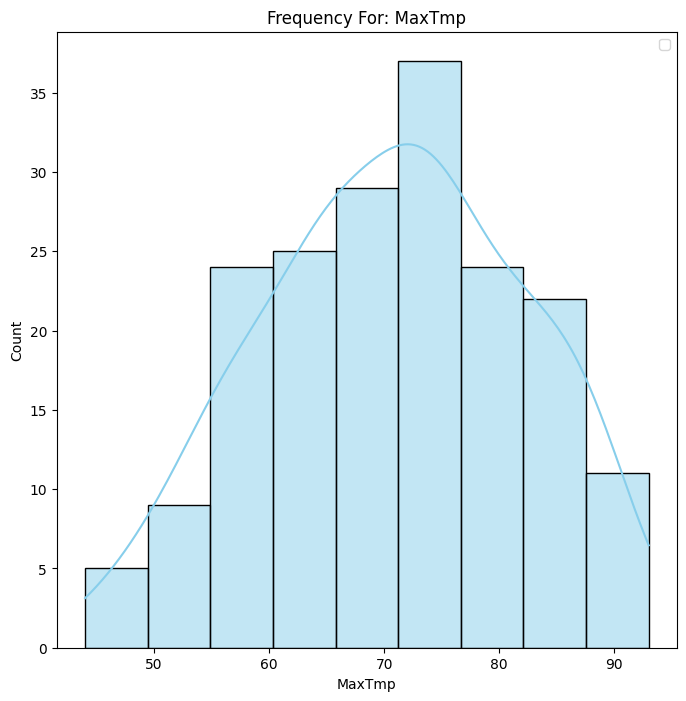

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


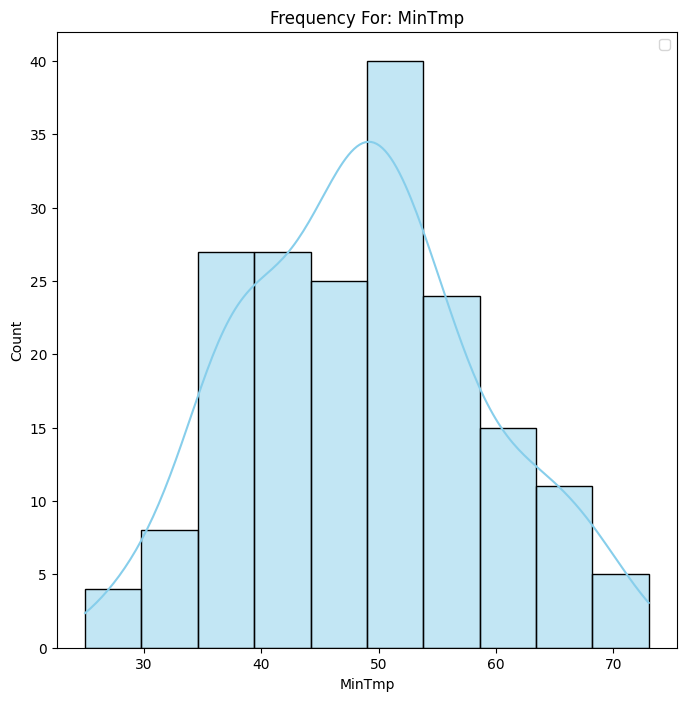

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


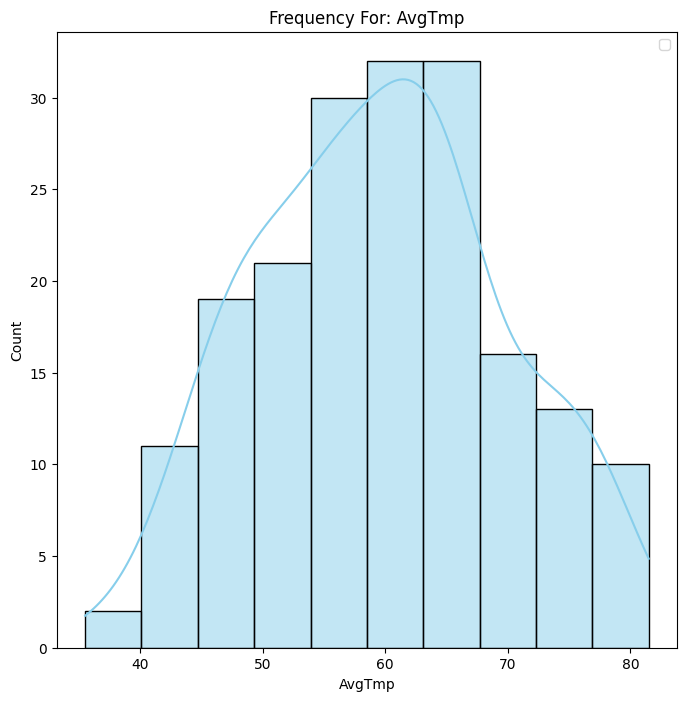

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


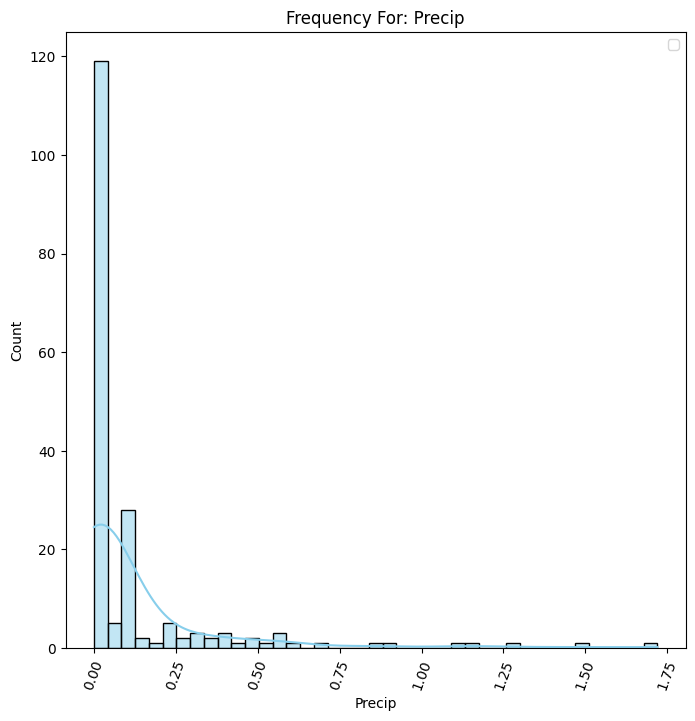

<Figure size 640x480 with 0 Axes>

In [131]:
datCols = ['MaxTmp', 'MinTmp', 'AvgTmp', 'Precip']

for cols in datCols:
    plt.figure(figsize = (8, 8))
    if cols == 'Precip':
        sns.histplot(weatherIn[cols], kde = True, color = 'skyblue')
        plt.xticks(rotation = 70)
    else:
        sns.histplot(weatherIn[cols], kde = True, color = 'skyblue')
    plt.xlabel(cols)
    plt.title("Frequency For: " + cols)
    plt.legend()
    plt.show()

plt.tight_layout()

# for cols in datCols:
#     plt.figure(figsize = (8, 8))
#     if cols == 'Precip':
#         sns.histplot(mayAvg[cols], kde = True, color = 'lightgreen')
#         plt.xticks(rotation = 70)
#     else:
#         sns.histplot(mayAvg[cols], kde = True, color = 'lightgreen')
#     plt.xlabel(cols)
#     plt.title("Frequency For: " + cols)
#     plt.legend()
#     plt.show()

# Model Packages and Training

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = weatherIn[['MaxTmp', 'MinTmp', 'Depart', 'HDD', 'CDD', 'Precip']]
y = weatherIn['AvgTmp']

In [179]:
# Creating the train and test sets and starting the model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.165, random_state = 42, shuffle = True)
model = LinearRegression()

In [180]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(y_pred)
print(y_pred.size)
print("Mean Squared Error:", mse)

[74.5 63.  56.  46.  44.  65.  65.5 57.  50.5 72.  73.  64.  40.5 64.5
 50.  61.5 52.5 78.5 71.5 54.5 54.  68.  48.  58.  35.5 58.5 48.5 75.
 63.5 65.5 62.5]
31
Mean Squared Error: 1.0911727618024834e-28


In [183]:
# Convert 'Date' column to datetime type
weatherIn['Date'] = pd.to_datetime(weatherIn['Date'])

weatherIn['Month'] = weatherIn['Date'].dt.month

mayAvg = weatherIn.groupby('Month').mean().reset_index()
print(mayAvg)

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
plt.plot(mayAvg.index, monthly_avg['AvgTmp'], label='Average May Data')
plt.plot(monthly_avg.index, y_pred, label='Predicted Values')
plt.xlabel('Day')
plt.ylabel('Average Temperature')
plt.title('Average May Temperature with Predicted Values')
plt.legend()
plt.show()